In [12]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

<class 'networkx.classes.multidigraph.MultiDiGraph'>


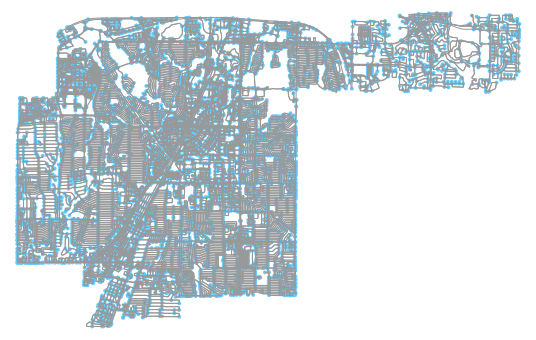

<Figure size 432x288 with 0 Axes>

In [2]:
place_name = "Richardson, Texas, USA"
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

In [6]:
area = ox.gdf_from_place(place_name)
#buildings = ox.buildings_from_place(place_name)
type(area)
#type(buildings)

AttributeError: module 'osmnx' has no attribute 'buildings_from_place'

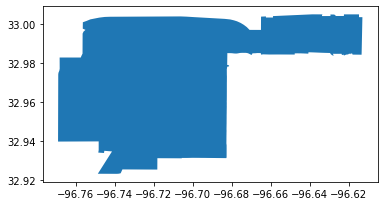

In [7]:
area.plot()

In [10]:
nodes, edges = ox.graph_to_gdfs(graph)

In [9]:
nodes.head()

,highway,osmid,ref,x,y,geometry
6734938112,NaN,6734938112,NaN,-96.728720,32.948309,POINT (-96.7287199 32.9483094)
6734938113,NaN,6734938113,NaN,-96.728544,32.948311,POINT (-96.7285444 32.9483109)
5581799425,NaN,5581799425,NaN,-96.728174,32.999944,POINT (-96.7281739 32.9999439)
5581799424,NaN,5581799424,NaN,-96.728945,33.000211,POINT (-96.728945 33.0002111)
5581799426,NaN,5581799426,NaN,-96.728874,33.000370,POINT (-96.728874 33.0003702)


In [11]:
edges.head()

,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v
0,NaN,NaN,"LINESTRING (-96.7287199 32.9483094, -96.728544...",primary,NaN,0,NaN,16.377,NaN,East Main Street,False,557627463,NaN,NaN,NaN,6734938112,6734938113
1,NaN,NaN,"LINESTRING (-96.7287199 32.9483094, -96.729023...",primary,NaN,0,NaN,28.359,NaN,East Main Street,False,557627463,NaN,NaN,NaN,6734938112,6734938105
2,private,NaN,"LINESTRING (-96.7287199 32.9483094, -96.728715...",service,NaN,1,NaN,54.905,NaN,NaN,False,717093586,NaN,NaN,NaN,6734938112,6734938105
3,NaN,NaN,"LINESTRING (-96.7285444 32.9483109, -96.728217...",primary,NaN,0,NaN,30.496,NaN,East Main Street,False,557627463,NaN,NaN,NaN,6734938113,6734938122
4,NaN,NaN,"LINESTRING (-96.7285444 32.9483109, -96.728719...",primary,NaN,0,NaN,16.377,NaN,East Main Street,False,557627463,NaN,NaN,NaN,6734938113,6734938112


In [13]:
df = nx.from_pandas_edgelist(edges, source='u', target = 'v', edge_attr=True)

In [14]:
df.nodes()

NodeView((6734938112, 6734938113, 6734938105, 6734938122, 6734938120, 5581799425, 5581799417, 5581799416, 5581799424, 5581799426, 5581799422, 5581799415, 150372357, 3100841114, 150051584, 150055444, 6734938121, 6734938123, 81721217, 5812155664, 5711943693, 4563517888, 6734938124, 81721225, 6734938133, 81721223, 6734938134, 6734938135, 5380261099, 5170462747, 5170462757, 5170462783, 5170462755, 5170462756, 82051617, 5922183450, 5170462773, 5170462758, 5170462759, 5922183826, 5922183829, 5922183465, 6752010280, 150163746, 6752073094, 5798508057, 5798508054, 5798508059, 5798508056, 5170462772, 82051613, 5922183447, 5922183449, 206405689, 5813812904, 5813812898, 6753078977, 5170462778, 5170462785, 5170462781, 5170462782, 82051619, 5922183453, 82051623, 5922183461, 82051627, 81821768, 81758330, 4838753252, 81893096, 6727041097, 81599073, 6727041109, 6727041102, 6727041096, 81750121, 5431644987, 5445910603, 81807400, 81658722, 6727041103, 81750932, 5831772742, 6782221661, 6727041108, 1503045

In [15]:
df.edges()

EdgeView([(6734938112, 6734938113), (6734938112, 6734938105), (6734938113, 6734938122), (6734938113, 6734938120), (6734938105, 6734938094), (6734938122, 6734938123), (6734938122, 5711943693), (6734938120, 6734938121), (6734938120, 6734938123), (5581799425, 5581799417), (5581799425, 5581799416), (5581799425, 5581799424), (5581799417, 5581799418), (5581799417, 5581799422), (5581799416, 5581799426), (5581799416, 5581799409), (5581799424, 5581799426), (5581799424, 5581799422), (5581799426, 5581799415), (5581799415, 5581799409), (5581799415, 5581799412), (150372357, 3100841114), (150372357, 150051584), (150372357, 150055444), (150372357, 150049000), (3100841114, 3100841062), (3100841114, 5581745434), (3100841114, 150166993), (150051584, 150051574), (150051584, 5626524391), (150055444, 150051574), (150055444, 150055436), (150055444, 150049002), (6734938121, 81721217), (6734938121, 5812155664), (6734938123, 4563517888), (81721217, 81758015), (81721217, 1854842749), (81721217, 4563517888), (58

In [16]:
import matplotlib.pyplot as plt

In [20]:
shortest_path_distance = nx.dijkstra_path(df, source=6734938112, target=5798495217, weight = 'length')

In [21]:
shortest_path_distance

[6734938112,
 6734938113,
 6734938122,
 5711943693,
 81721215,
 81989013,
 6745857946,
 6745857949,
 6746539648,
 81715723,
 1854822211,
 82002074,
 1854822416,
 1854822241,
 5388727263,
 5388727647,
 6753406027,
 3360697892,
 81741016,
 1854822209,
 5380261099,
 6734938134,
 5380261083,
 2047624129,
 2047624117,
 2047624152,
 2047624151,
 2047624163,
 2047624173,
 2047624147,
 2047624165,
 2047624133,
 2047624132,
 2047624125,
 5431645731,
 6726955891,
 2047624134,
 6726955888,
 5431645729,
 2047624126,
 5817635128,
 81823110,
 5817635123,
 5795246589,
 5795246593,
 6726955900,
 81980625,
 81614769,
 5780586019,
 5780586022,
 5780586051,
 5798495219,
 5798495220,
 5798495217]

In [27]:
graph = ox.simplify_graph(graph)

Exception: This graph has already been simplified, cannot simplify it again.

In [30]:
def check_if_is_in(target_list, u, v):
    for i in range(len(target_list)):
        try:
            if u==target_list[i] and v==target_list[i+1]:
                return True
        except IndexError:
            break
    return False

<Figure size 432x288 with 0 Axes>

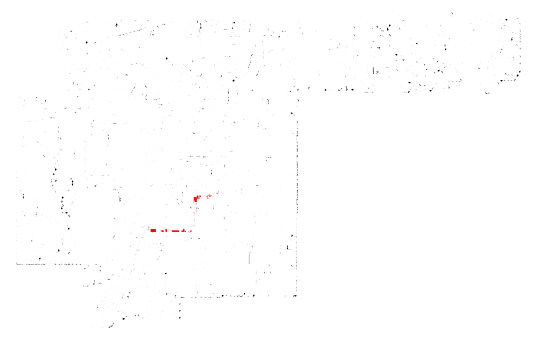

<Figure size 432x288 with 0 Axes>

In [33]:
ec = ['r' if (check_if_is_in(shortest_path_distance, u, v)) else 'w' for u, v, k in graph.edges(keys=True)]
fig, ax = ox.plot_graph(graph, node_color='w', node_edgecolor='k', node_size=1, node_zorder=0, edge_color=ec, edge_linewidth=3)
plt.tight_layout()